In [1]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh_TGV1')
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import Beams
from HHG import ActiveGrating
import Graph

Grating = Beams.Grating()


In [2]:
IR = Beams.Pulse(w0=50e-6, lam=800e-9, wt=20e-15)

#grid = IR.ST_Grid(Lx=1e-3, Ly=1e-3, Lt=100e-15, Nx=601, Ny=601, Nt=101)
grid = IR.Grid(Lx=1e-3, Ly=250e-15, Nx=1001, Ny=5001)
STOV = IR.LG_STOV(grid[0], 0, grid[1], l=1, p=0) # Axis0 = time, Axis1 = x

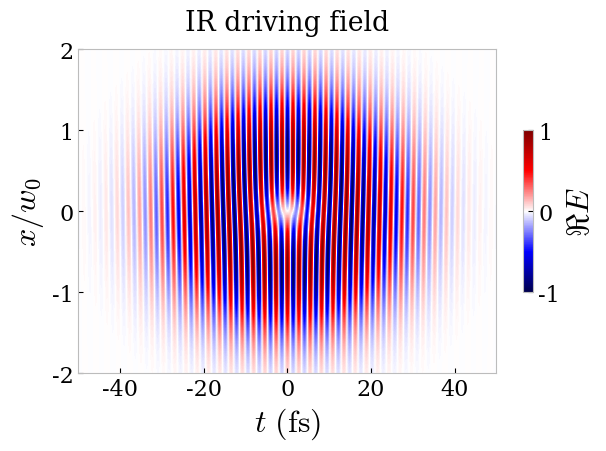

In [3]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, tight_layout=True)

x, t = grid[0][0], grid[1].T[0] # retrieve axes from meshgrid
x = x/IR.w0
t = t/1e-15
extent=[t[0], t[-1], x[0], x[-1]]

im = ax.imshow(np.real(STOV).T/np.max(np.real(STOV)), cmap='seismic', aspect='auto', extent=extent, vmin=-1, vmax=1)

cbar = plt.colorbar(im, orientation='vertical', ticks=[-1, 0, 1], shrink=0.5, aspect=15)
cbar.ax.set_yticklabels(['-1', '0', '1'])
cbar.ax.set_ylabel('$\Re E$')


ax.set_xlim(-50, 50)
ax.set_ylim(-2,2)

ax.set_xlabel('$t \ \mathrm{(fs)}$')
ax.set_ylabel('$x/w_0$')

ax.set_xticks([-40, -20, 0, 20, 40], [-40, -20, 0, 20, 40])
ax.set_yticks([-2, -1, 0, 1, 2], [-2, -1, 0, 1, 2])

ax.set_title('IR driving field')

plt.show()

In [4]:
IRspectrum, xw_grid = Grating.Disperse(field_0=STOV, grid_xt=grid)

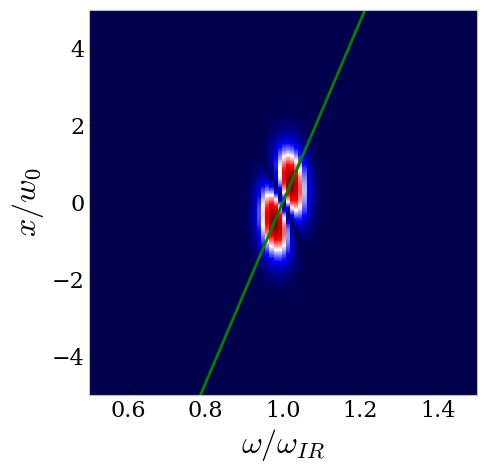

In [5]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(5,5))

x, w = xw_grid[0][0], xw_grid[1].T[0] # retrieve axes from meshgrid
x = x/IR.w0
w = w/IR.omega
extent=[w[0], w[-1], x[0], x[-1]]

ax.imshow(np.abs(IRspectrum).T, cmap='seismic', aspect='auto', extent=extent, interpolation='None')

ax.plot(w, (w-1)*IR.omega*IR.wt/2, color='g')

ax.set_xlim(0.5, 1.5)
ax.set_ylim(-5, 5)

ax.set_xlabel(r'$\omega/\omega_{IR}$')
ax.set_ylabel(r'$x/w_0$')

plt.show()

In [6]:
AG = ActiveGrating(qeff=3.5)
XUV_STOV = 0

for q in [11, 13, 15]:
    XUV_STOV += AG.Hq_NearField(IRfield=STOV, q=q)

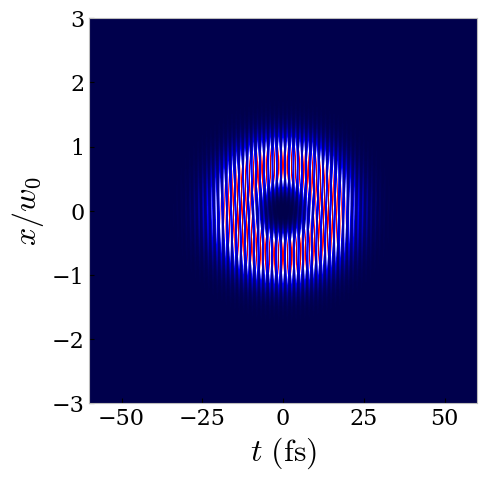

In [7]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(5,5))

x, t = grid[0][0], grid[1].T[0] # retrieve axes from meshgrid
x = x/IR.w0
t = t/1e-15
extent=[t[0], t[-1], x[0], x[-1]]

ax.imshow(np.abs(XUV_STOV).T, cmap='seismic', aspect='auto', extent=extent)

ax.set_xlim(-3*IR.wt/1e-15, 3*IR.wt/1e-15)
ax.set_ylim(-3, 3)

ax.set_xlabel('$t \ \mathrm{(fs)}$')
ax.set_ylabel(r'$x/w_0$')

plt.show()

In [8]:
XUVspectrum, xw_grid = Grating.Disperse(field_0=XUV_STOV, grid_xt=grid)


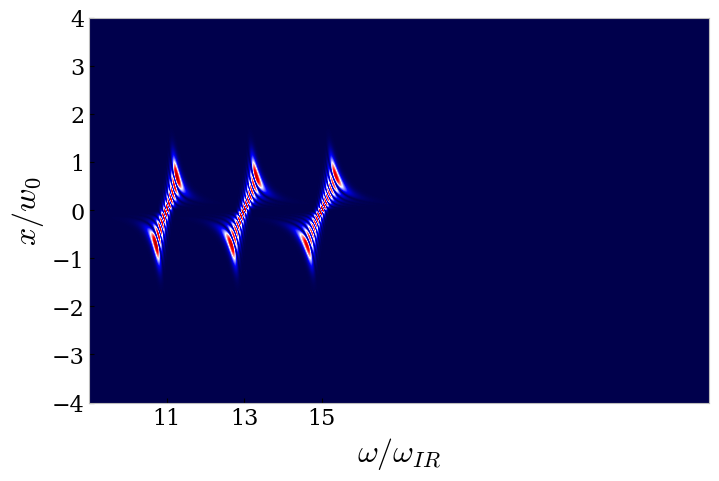

In [9]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(8,5))

x, w = xw_grid[0][0], xw_grid[1].T[0] # retrieve axes from meshgrid
x = x/IR.w0
w = w/IR.omega
extent=[w[0], w[-1], x[0], x[-1]]

ax.imshow(np.abs(XUVspectrum).T, cmap='seismic', aspect='auto', extent=extent)

ax.set_xlim(9, 25)
ax.set_ylim(-4, 4)

ax.set_xlabel(r'$\omega/\omega_{IR}$')
ax.set_ylabel(r'$x/w_0$')

ax.set_xticks([11, 13, 15], [11, 13, 15])

plt.show()

In [10]:
x, w = xw_grid[0][0], xw_grid[1].T[0] # retrieve axes from meshgrid
Lx, Lw = x[-1]-x[0], w[-1]-w[0]
Nx, Nw = len(x), len(w)

test = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(XUVspectrum, axes=1), axis=1), axes=1)
test = test * (Lx/(Nx-1))
d=1
xp = np.fft.fftshift(np.fft.fftfreq(Nx, Lx/(Nx-1)))*d
lam_axis = 2*np.pi*3e8/w

for i in range(len(test)):
    test[i] = np.interp(xp*lam_axis[0], xp*lam_axis[i], test[i]) / lam_axis[i] 

C:\Users\tg263331\AppData\Local\Temp\ipykernel_4016\1955932188.py:9: RuntimeWarning: divide by zero encountered in divide
  lam_axis = 2*np.pi*3e8/w
C:\Users\tg263331\AppData\Local\Temp\ipykernel_4016\1955932188.py:12: RuntimeWarning: invalid value encountered in multiply
  test[i] = np.interp(xp*lam_axis[0], xp*lam_axis[i], test[i]) / lam_axis[i]


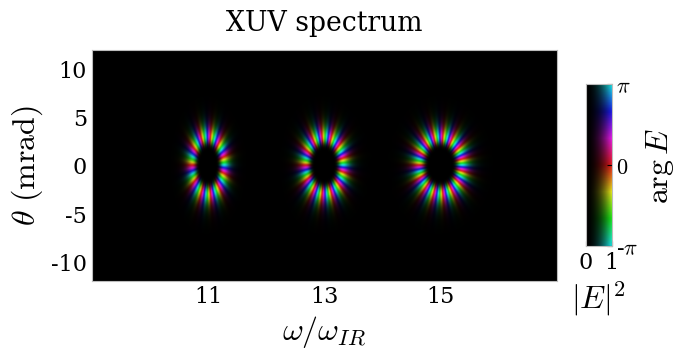

In [28]:
importlib.reload(Graph)


%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(6,3))

x, w = xp*lam_axis[0], xw_grid[1].T[0]
x = x*1e3
w = w/IR.omega
extent=[w[0], w[-1], x[0], x[-1]]


im = Graph.Phase2D().colorize(test.T, mode='Intensity')
ins = Graph.Phase2D().key_inset(mode='Intensity', ax=ax)

ax.imshow(im, aspect='auto', extent=extent)

ax.set_xlim(9, 17)
ax.set_ylim(-12, 12)

ax.set_xlabel(r'$\omega/\omega_{IR}$')
ax.set_ylabel(r'$\theta \ \mathrm{(mrad)}$')

ax.set_xticks([11, 13, 15], [11, 13, 15])
ax.set_yticks([-10, -5, 0, 5, 10], [-10, -5, 0, 5, 10])

ax.set_title('XUV spectrum')

plt.show()

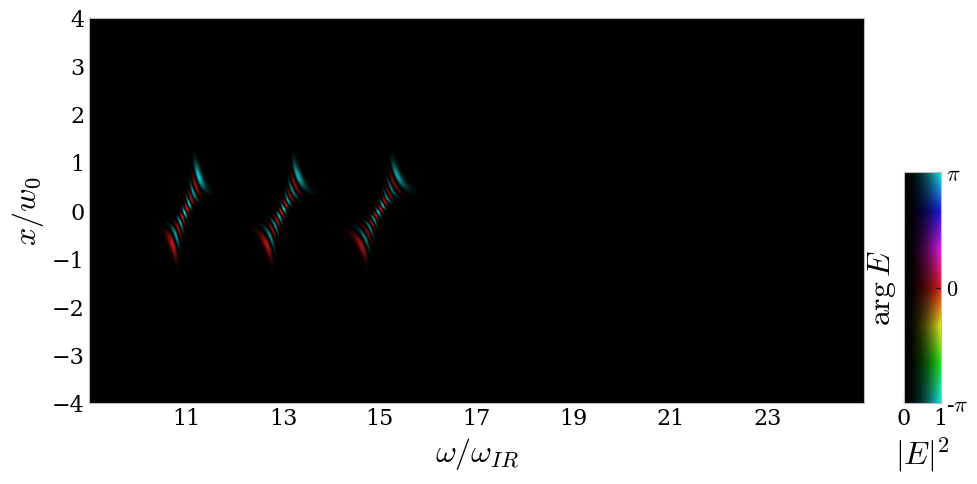

In [12]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x, w = xw_grid[0][0], xw_grid[1].T[0] # retrieve axes from meshgrid
x = x/IR.w0
w = w/IR.omega
extent=[w[0], w[-1], x[0], x[-1]]


im = Graph.Phase2D().colorize(XUVspectrum.T, mode="Intensity")
ins = Graph.Phase2D().key_inset(mode='Intensity', ax=ax)

ax.imshow(im, aspect='auto', extent=extent)


ax.set_xlim(9, 25)
ax.set_ylim(-4, 4)

ax.set_xlabel(r'$\omega/\omega_{IR}$')
ax.set_ylabel(r'$x/w_0$')

ax.set_xticks([11, 13, 15, 17, 19, 21, 23], [11, 13, 15, 17, 19, 21, 23])

plt.show()

In [13]:
# Now we propagate the IR focus to the far-field:

x, w = xw_grid[0][0], xw_grid[1].T[0] # retrieve axes from meshgrid
Lx, Lw = x[-1]-x[0], w[-1]-w[0]
Nx, Nw = len(x), len(w)

IRspFF = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(IRspectrum, axes=1), axis=1), axes=1)
IRspFF = IRspFF * (Lx/(Nx-1))
d=1
xp = np.fft.fftshift(np.fft.fftfreq(Nx, Lx/(Nx-1)))*d
lam_axis = 2*np.pi*3e8/w

for i in range(len(IRspFF)):
    IRspFF[i] = np.interp(xp*lam_axis[0], xp*lam_axis[i], IRspFF[i]) / lam_axis[i] 

C:\Users\tg263331\AppData\Local\Temp\ipykernel_4016\287430981.py:11: RuntimeWarning: divide by zero encountered in divide
  lam_axis = 2*np.pi*3e8/w
C:\Users\tg263331\AppData\Local\Temp\ipykernel_4016\287430981.py:14: RuntimeWarning: invalid value encountered in multiply
  IRspFF[i] = np.interp(xp*lam_axis[0], xp*lam_axis[i], IRspFF[i]) / lam_axis[i]


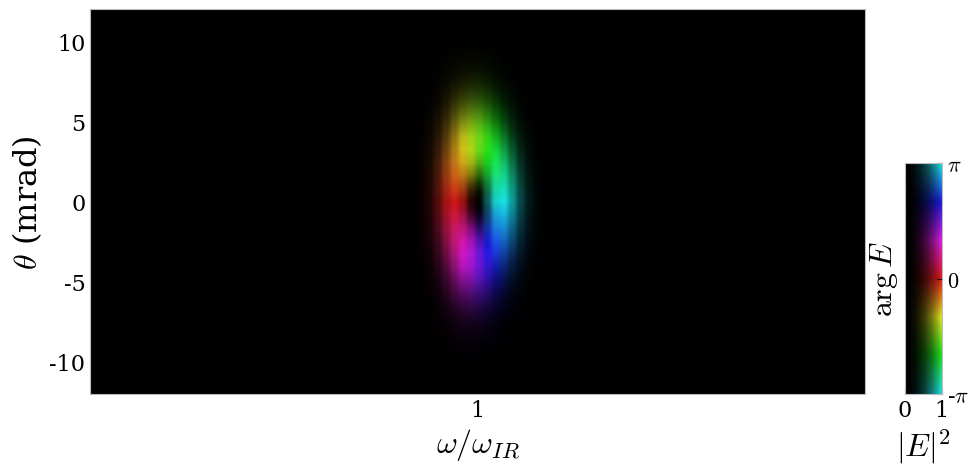

In [14]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x, w = xp*lam_axis[0], xw_grid[1].T[0]
x = x*1e3
w = w/IR.omega
extent=[w[0], w[-1], x[0], x[-1]]


im = Graph.Phase2D().colorize(IRspFF.T, mode='Intensity')
ins = Graph.Phase2D().key_inset(mode='Intensity', ax=ax)

ax.imshow(im, aspect='auto', extent=extent)

ax.set_xlim(0.5, 1.5)
ax.set_ylim(-12, 12)

ax.set_xlabel(r'$\omega/\omega_{IR}$')
ax.set_ylabel(r'$\theta$ (mrad)')

ax.set_xticks([1], [1])
ax.set_yticks([-10, -5, 0, 5, 10], [-10, -5, 0, 5, 10])

plt.show()

In [15]:
# Finally, we inverse FT the FF spectrum to get the FF spatiotemporal wavepacket
importlib.reload(Beams)

Grating = Beams.Grating()
IR = Beams.Pulse(w0=50e-6, lam=800e-9, wt=20e-15)

newgrid = np.meshgrid(xp*lam_axis[0], xw_grid[1].T[0])

wp, xt_grid = Grating.Recombine(np.nan_to_num(IRspFF), newgrid)

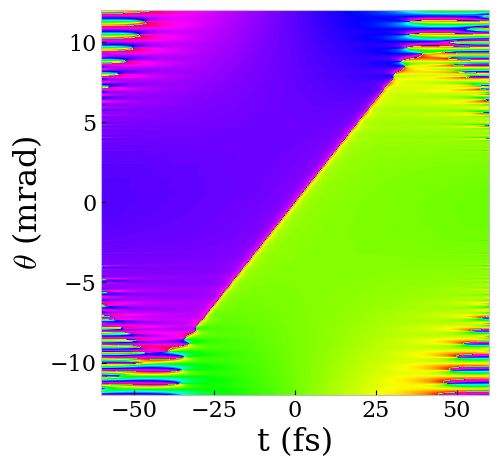

In [16]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(5,5))

x, t = xt_grid[0][0], xt_grid[1].T[0] # retrieve axes from meshgrid
x = x*1e3
t = t/1e-15
extent=[t[0], t[-1], x[0], x[-1]]

wpphi = IR.RemoveDynPhase(wp, xt_grid)

ax.imshow(np.angle(wpphi).T, cmap='hsv', aspect='auto', extent=extent)

ax.set_xlim(-3*IR.wt/1e-15, 3*IR.wt/1e-15)
ax.set_ylim(-12,12)

ax.set_xlabel('t (fs)')
ax.set_ylabel(r'$\theta$ (mrad)')

plt.show()

In [17]:
np.max(t)*2*np.pi

785.398163397448